## Ivory & Manidea dataset occurrence comparison

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [22]:
def agg_year_record(series):
    prev = 0
    for year, num in series.iteritems():
        series[year] = num + prev
        prev = series[year]
    return series

In [13]:
df_ivory = pd.read_csv('./ivory_row_count.csv')
df_manidae = pd.read_csv('./manidae_row_count.csv')
df_ivory = df_ivory.set_index('year')
df_manidae = df_manidae.set_index('year')

In [26]:
df = df_ivory.join(df_manidae, how='outer')
#fill the only na cell
df.loc[1976, 'manidae'] = 0
#agg
df['ivory'] = agg_year_record(df['ivory'])
df['manidae'] = agg_year_record(df['manidae'])
df

,ivory,manidae
year,,
1976,2,0.0
1977,81,4.0
1978,280,10.0
1979,1176,26.0
1980,2526,65.0
1981,8977,324.0
1982,16284,503.0
1983,28018,752.0
1984,38627,957.0


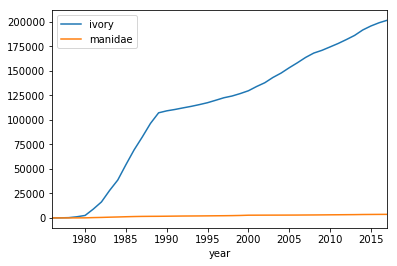

In [27]:
df.plot()

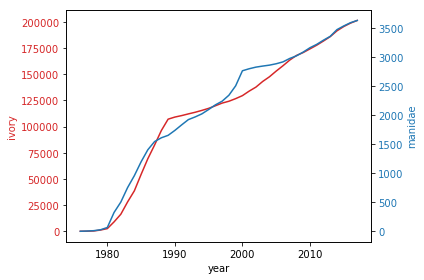

In [30]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('ivory', color=color)
ax1.plot(df.index, df['ivory'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('manidae', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df['manidae'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()